<div style="background-color:white; text-align:center; font-family:Arial, Helvetica, sans-serif; padding:50px;">
  <!-- Tytuł -->
  <div style="color:#993520; font-size:60px; font-weight:bold; margin-bottom:20px;">
    SENTIMENT ANALYSIS
  </div>

  <!-- Podtytuł -->
  <div style="color:#993520; font-size:35px; margin-bottom:40px;">
    Principles of textual data preprocessing
  </div>

  <!-- Autor -->
  <div style="color:black; font-size:30px; margin-bottom:10px;">
    Maciej Świtała, PhD
  </div>

  <!-- Data / semestr -->
  <div style="color:black; font-size:30px; margin-bottom:50px;">
    Autumn 2025
  </div>

  <!-- Logo -->
  <div>
    <img src="img/wne-logo-new-en.jpg" alt="WNE Logo" style="max-width:400px; height:auto;">
  </div>
</div>


### 1. Intro

In [5]:
# !pip install pandas numpy matplotlib nltk

In [4]:
import pandas as pd  # for working with data in DataFrames
import numpy as np  # numerical operations and arrays
import matplotlib.pyplot as plt  # data visualization

import pickle  # data loading
import re  # text preprocessing and cleaning (regular expressions)
import math  # mathematical functions
import statistics  # e.g., calculating quantiles

from collections import defaultdict  # dictionary with default values
from collections import Counter  # counting occurrences of elements

import nltk
from nltk.tokenize import word_tokenize  # text tokenization
# nltk.download('punkt_tab')  # neccessary for text tokenization
# nltk.download('wordnet')  # neccessary for lemmatisation
from nltk.corpus import stopwords  # stopwords list
# nltk.download('stopwords')  # neccesary for stopwords
from nltk.probability import FreqDist  # frequency distribution of tokens

In [8]:
# let us load an example dataset; these are opinions on an individual McDonald's restaurant in the U.S.
with open("data/nichecom-opinions-mcdonalds.txt", "rb") as fp:
    data = pickle.load(fp)

In [9]:
# initial inspection of the first five news
data.head()

,Review,Rating,Position,Date
0,working for McDonald's is very unique you lear...,Rating 4 out of 5,Senior Employee,2024-09-30
1,It have been great so far. The people are real...,Rating 3 out of 5,Entry Level Employee,2024-09-12
2,The Mcdonalds that I work at is a very good jo...,Rating 3 out of 5,Manager / Director,2024-09-09
3,While the workplace environment may not be per...,Rating 2 out of 5,Intern / Student Worker,2024-06-10
4,The overall experience of working at a McDonal...,Rating 3 out of 5,Other,2024-05-31


In [10]:
data.shape

(497, 4)

In [11]:
texts_lengths = [len(text) for text in data['Review']]  # get the length of each text

# basic descriptive statistics of the texts length
print("Min. =", np.round(min(texts_lengths),2))                     # minimum length
print("Max. =", np.round(max(texts_lengths),2))                     # maximum length
print("Mean =", np.round(statistics.mean(texts_lengths),2))         # average length
print("Median =", np.round(statistics.median(texts_lengths),2))     # median length
print("Std. dev. =", np.round(statistics.stdev(texts_lengths),2))   # standard deviation

# most importantly: there are no empty documents; the shortest are 3/4 of the A4 page

Min. = 0
Max. = 996
Mean = 230.71
Median = 195
Std. dev. = 156.15


In [12]:
# let us remove empty reviews
data = data[data['Review'].map(lambda x: len(x)>0)]

In [13]:
texts_lengths = [len(text) for text in data['Review']]  # get the length of each text

# basic descriptive statistics of the texts length
print("Min. =", np.round(min(texts_lengths),2))                     # minimum length
print("Max. =", np.round(max(texts_lengths),2))                     # maximum length
print("Mean =", np.round(statistics.mean(texts_lengths),2))         # average length
print("Median =", np.round(statistics.median(texts_lengths),2))     # median length
print("Std. dev. =", np.round(statistics.stdev(texts_lengths),2))   # standard deviation

# most importantly: there are no empty documents; the shortest are 3/4 of the A4 page

Min. = 10
Max. = 996
Mean = 242.93
Median = 204.0
Std. dev. = 150.67


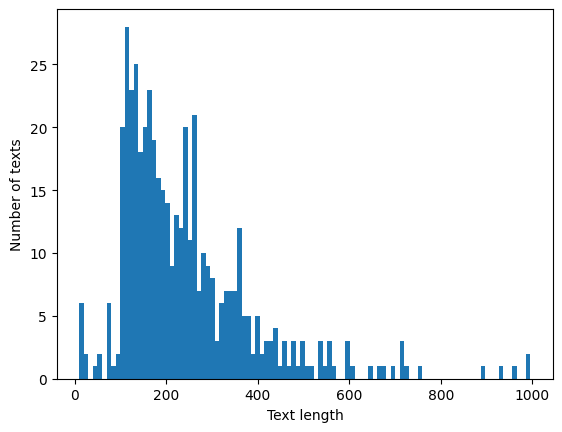

In [14]:
# plot a histogram of text lengths
plt.hist(texts_lengths, bins=100)
plt.xlabel('Text length')
plt.ylabel('Number of texts')
plt.show()

In [15]:
# the shortest opinions appear to make sense
data['Review'].sort_values(key=lambda x: x.str.len()).head(10)

461                                           Very good.
463                                           Very good.
462                                           Very good.
464                                           Very good.
326                                       The challenges
324                                      The good things
460                                Very good. Very good.
331                         It makes me enjoy what I do.
112             I got pay raise even after only a month.
51     I've never experienced discrimination or bully...
Name: Review, dtype: object

In [16]:
# let us check if there are duplicated opinions
data.duplicated().sum()

np.int64(0)

### 2. Textual data preprocessing

#### 2.1. Initial data cleaning

In [17]:
# remove newline symbols (\n)
texts = [re.sub('\n', ' ', text) for text in data['Review']]

# remove all numbers
texts = [re.sub(r'[0-9]+', '', text) for text in texts]

# remove special characters ,!?/:;''()``’“-”—#@%&$*~^|<>
texts = [re.sub(r"[,\!?/:;''()``’“-”—#@%&$*~^|<>]", '', text) for text in texts]

# remove dots (.)
texts = [re.sub(r"[.]+", '', text) for text in texts]

# convert all letters to lower case
texts = [text.lower() for text in texts]

# remove one-letter words
texts = [re.sub(r'\b\w\b', '', text) for text in texts]

# remove multiple spaces
texts = [re.sub(r'\s+', ' ', text).strip() for text in texts]

# cleaned list of texts
# texts[0:5]

#### 2.2 Tokenisation

In [18]:
# importantly, we're going to tokenize each text into individual words - word_tokenize() from NLTK splits a string into a list of words/punctuation;
# this loop iterates over each text in the cnn_texts list and replaces the original string with a list of its tokens (words)

texts_tokenised = [word_tokenize(text) for text in texts] # tokenise each text

# new cnn_texts is a list of lists, where each inner list contains the words of a text
print(texts_tokenised[0])

# counts unique tokens after this step
freq_dict = Counter(token for tList in texts_tokenised for token in np.unique(tList))
print('There are', len(freq_dict), 'unique tokens')

['working', 'for', 'mcdonalds', 'is', 'very', 'unique', 'you', 'learn', 'lot', 'of', 'things', 'and', 'you', 'get', 'to', 'enjoy', 'becoming', 'friends', 'with', 'coworkers']
There are 2162 unique tokens


#### 2.3. Stemming vs. lemmatisation

In [19]:
# import and create an English stemmer from NLTK's SnowballStemmer; stemming is the process of reducing a word to its root form
stemmer = nltk.stem.snowball.EnglishStemmer()

# example usage:
stemmer.stem('militaries')

'militari'

In [20]:
# initialise the English Snowball stemmer
stemmer = nltk.stem.snowball.EnglishStemmer()

# make a copy of the tokenised texts to preserve the original
texts_stemmed = []

# iterate over each document (list of tokens) in texts_tokenised
for doc_tokens in texts_tokenised:
    # stem every word in the document
    stemmed_doc = [stemmer.stem(word) for word in doc_tokens]
    # append the stemmed document to the new list
    texts_stemmed.append(stemmed_doc)

# show the resulting stemmed texts
print(texts_stemmed[0])

# counts unique tokens after this step
freq_dict = Counter(token for tList in texts_stemmed for token in np.unique(tList))
print('There are', len(freq_dict), 'unique tokens')

['work', 'for', 'mcdonald', 'is', 'veri', 'uniqu', 'you', 'learn', 'lot', 'of', 'thing', 'and', 'you', 'get', 'to', 'enjoy', 'becom', 'friend', 'with', 'cowork']
There are 1645 unique tokens


In [21]:
# import and create an English lemmatiser from NLTK's WordNetLemmatizer; lemmatisation is the process of converting a word to its basic/dictionary form
lemmatiser = nltk.stem.WordNetLemmatizer()

# example usage:
lemmatiser.lemmatize('militaries')

'military'

In [22]:
# initialise the wordnet lemmatiser
lemmatiser = nltk.stem.WordNetLemmatizer()

# make a copy of the tokenised texts to preserve the original
texts_lemmatised = []

# iterate over each document (list of tokens) in texts_tokenised
for doc_tokens in texts_tokenised:
    # lemmatise every word in the document
    lemmatised_doc = [lemmatiser.lemmatize(word) for word in doc_tokens]
    # append the lemmatised document to the new list
    texts_lemmatised.append(lemmatised_doc)

# show the first document after lemmatisation
print(texts_lemmatised[0])

# count unique tokens after lemmatisation
freq_dict = Counter(token for doc in texts_lemmatised for token in np.unique(doc))
print('there are', len(freq_dict), 'unique tokens')

['working', 'for', 'mcdonalds', 'is', 'very', 'unique', 'you', 'learn', 'lot', 'of', 'thing', 'and', 'you', 'get', 'to', 'enjoy', 'becoming', 'friend', 'with', 'coworkers']
there are 1989 unique tokens


#### 2.4. Removing stopwords

In [23]:
# load the list of english stopwords from nltk corpus
stop_words = nltk.corpus.stopwords.words('english')

# print how many stopwords are in the list
print(len(stop_words), 'stopwords')

# display the stopwords
print(stop_words)

# adding some specific stopwords (if needed)
# stop_words.append('``')

198 stopwords
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', 

In [24]:
# clean stopwords like we cleaned the texts
stop_words_cleaned = [re.sub(r'\n', ' ', w) for w in stop_words]                                        # remove newlines
stop_words_cleaned = [re.sub(r'[0-9]+', '', w) for w in stop_words_cleaned]                             # remove numbers
stop_words_cleaned = [re.sub(r"[,\!?/:;''()``’“-”—#@%&$*~^|<>]", '', w) for w in stop_words_cleaned]    # special chars
stop_words_cleaned = [re.sub(r"[.]+", '', w) for w in stop_words_cleaned]                               # remove dots
stop_words_cleaned = [w.lower() for w in stop_words_cleaned]                                            # lowercase
stop_words_cleaned = [re.sub(r'\b\w\b', '', w) for w in stop_words_cleaned]                             # remove one-letter words
stop_words_cleaned = [re.sub(r'\s+', ' ', w).strip() for w in stop_words_cleaned]                       # remove multiple spaces

# initialise the lemmatiser
lemmatiser = nltk.stem.WordNetLemmatizer()

# lemmatise cleaned stopwords
stop_words_lemma = [lemmatiser.lemmatize(w) for w in stop_words_cleaned]

# remove stopwords from tokenised texts
texts_cleaned = []
for doc_tokens in texts_lemmatised:
    filtered_doc = [word for word in doc_tokens if word not in stop_words_lemma]
    texts_cleaned.append(filtered_doc)

# show a sample of cleaned texts
print(texts_cleaned[0])

# count unique tokens after removing stopwords
freq_dict = Counter(token for doc in texts_cleaned for token in np.unique(doc))
print('there are', len(freq_dict), 'unique tokens')

['working', 'mcdonalds', 'unique', 'learn', 'lot', 'thing', 'get', 'enjoy', 'becoming', 'friend', 'coworkers']
there are 1854 unique tokens


In [ ]:
# concat cleaned texts to the dataframe
data['Review_cleaned'] = texts_cleaned

# save the cleaned texts to a txt file, with tab separator
data.to_csv("outputs/nichecom-opinions-mcdonalds_cleaned.txt", sep="\t", index=False, encoding="utf-8")

#### 2.5. Pipelines

In [32]:
# to increase code clarity, we could consider creating a pipeline
# we will use it in the future on other datasets if needed

lemmatiser = nltk.stem.WordNetLemmatizer()
stop_words = nltk.corpus.stopwords.words('english')

def clean_text(text):
    """Cleans a single text string."""
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r"[,\!?/:;''()``’“-”—#@%&$*~^|<>]", '', text)
    text = re.sub(r"[.]+", '', text)
    text = text.lower()
    text = re.sub(r'\b\w\b', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def tokenize_text(text):
    """Tokenizes a cleaned text."""
    return word_tokenize(text)

def lemmatize_tokens(tokens):
    """Lemmatizes a list of tokens."""
    return [lemmatiser.lemmatize(token) for token in tokens]

def clean_stopwords(tokens, stop_words_list=None):
    """Removes stopwords from a list of tokens."""
    if stop_words_list is None:
        stop_words_list = stop_words
    stop_words_cleaned = [clean_text(w) for w in stop_words_list]
    stop_words_lemma = [lemmatiser.lemmatize(w) for w in stop_words_cleaned]
    return [token for token in tokens if token not in stop_words_lemma]

def count_unique_tokens(texts):
    """Counts unique tokens across a list of tokenized texts."""
    return Counter(token for doc in texts for token in np.unique(doc))

def process_texts_verbose(data):
    """Full pipeline with printing unique token counts after each step."""
    # 1. Clean texts
    cleaned = [clean_text(text) for text in data]
    freq_cleaned = count_unique_tokens([tokenize_text(t) for t in cleaned])
    print('After cleaning:', len(freq_cleaned), 'unique tokens')

    # 2. Tokenize
    tokenized = [tokenize_text(text) for text in cleaned]
    freq_tokenized = count_unique_tokens(tokenized)
    print('After tokenization:', len(freq_tokenized), 'unique tokens')

    # 3. Lemmatize
    lemmatized = [lemmatize_tokens(doc) for doc in tokenized]
    freq_lemmatized = count_unique_tokens(lemmatized)
    print('After lemmatization:', len(freq_lemmatized), 'unique tokens')

    # 4. Remove stopwords
    cleaned_texts = [clean_stopwords(doc) for doc in lemmatized]
    freq_final = count_unique_tokens(cleaned_texts)
    print('After removing stopwords:', len(freq_final), 'unique tokens')

    return cleaned_texts

### 3. Further corpus exploration

#### 3.1. Token counts

In [33]:
# after all the cleaning, let us investigate the corpus deeper, starting from the words counts
hugelist = [item for sublist in texts_cleaned for item in sublist]

# let us access most frequent tokens
fdist = FreqDist(hugelist)
top = fdist.most_common(10)
top

[('work', 315),
 ('job', 235),
 ('mcdonalds', 198),
 ('working', 163),
 ('good', 145),
 ('people', 130),
 ('customer', 128),
 ('great', 118),
 ('employee', 114),
 ('get', 113)]

#### 3.2. N-grams

In [34]:
# this function generates n-grams for a list of tokens over a specified range of n values
def generate_ngrams(tokens, ngram_range=(1,3)):

    all_ngrams = []  # this list will store all generated n-grams

    # loop over each n in the range (e.g., 1, 2, 3)
    for n in range(ngram_range[0], ngram_range[1]+1):
        # create sliding windows of length n
        ngrams = zip(*[tokens[i:] for i in range(n)])  # e.g., for bigrams: [tokens[0:], tokens[1:]]
        
        # join tokens with underscores to form n-gram strings
        all_ngrams.extend(['_'.join(gram) for gram in ngrams])
    
    return all_ngrams  # return the complete list of n-grams

In [35]:
# apply n-gram generation to all cleaned texts
# texts_cleaned is a list of documents, each a list of tokens
texts_with_ngrams = [generate_ngrams(doc, ngram_range=(1,3)) for doc in texts_cleaned]

# after this step:
# - texts_with_ngrams[i] contains all unigrams, bigrams, and trigrams for document i
# - each n-gram is a single string (e.g., "new_york", "war_in_ukraine")

# show a sample of cleaned texts
print(texts_with_ngrams[0])

# count unique tokens after incorporation of n-grams
freq_dict = Counter(token for doc in texts_with_ngrams for token in np.unique(doc))
print('there are', len(freq_dict), 'unique tokens')

['working', 'mcdonalds', 'unique', 'learn', 'lot', 'thing', 'get', 'enjoy', 'becoming', 'friend', 'coworkers', 'working_mcdonalds', 'mcdonalds_unique', 'unique_learn', 'learn_lot', 'lot_thing', 'thing_get', 'get_enjoy', 'enjoy_becoming', 'becoming_friend', 'friend_coworkers', 'working_mcdonalds_unique', 'mcdonalds_unique_learn', 'unique_learn_lot', 'learn_lot_thing', 'lot_thing_get', 'thing_get_enjoy', 'get_enjoy_becoming', 'enjoy_becoming_friend', 'becoming_friend_coworkers']
there are 18637 unique tokens


In [36]:
# after adding n-grams, let us see the words counts again
hugelist = [item for sublist in texts_with_ngrams for item in sublist]

# let us access most frequent tokens
fdist = FreqDist(hugelist)
top = fdist.most_common(10)
top

[('work', 315),
 ('job', 235),
 ('mcdonalds', 198),
 ('working', 163),
 ('good', 145),
 ('people', 130),
 ('customer', 128),
 ('great', 118),
 ('employee', 114),
 ('get', 113)]

#### 3.3. TF, DF, IDF and TF-IDF statistics

In [37]:
# this function computes TF, DF, IDF, TF-IDF for all the tokens under consideration

def compute_tfidf(texts):

    N = len(texts)  # number of documents
    
    # 1. Compute TF for each document
    tf_docs = []
    for doc in texts:
        counts = Counter(doc)
        total_words = len(doc)
        tf_doc = {word: count / total_words for word, count in counts.items()}
        tf_docs.append(tf_doc)
    
    # 2. Compute DF for each token (fraction of docs containing the token)
    df_dict = {}
    for doc in texts:
        for token in set(doc):
            df_dict[token] = df_dict.get(token, 0) + 1
    df_dict = {token: count / N for token, count in df_dict.items()}
    
    # 3. Compute IDF
    idf_dict = {token: math.log(1 / df) for token, df in df_dict.items()}
    
    # 4. Compute TF-IDF for each document
    tfidf_docs = []
    for tf_doc in tf_docs:
        tfidf_doc = {token: tf_val * idf_dict[token] for token, tf_val in tf_doc.items()}
        tfidf_docs.append(tfidf_doc)
    
    return tf_docs, df_dict, idf_dict, tfidf_docs

In [38]:
tf_docs, df_dict, idf_dict, tfidf_docs = compute_tfidf(texts_with_ngrams)

#### 3.4. DF detailed inspection

In [39]:
# usually we are interested in DF, primarily due to its intuitive interpretation
# initial analysis of DF is the first step towards filtering out the too frequent and too rare tokens

# let us sort DF dictionary in descending order and take top 25
top25_df = dict(sorted(df_dict.items(), key=lambda item: item[1], reverse=True)[:25])

# here we present top 25 tokens according to DF statistic
for token, df in top25_df.items():
    print(f"{token}: {df:.3f}")

work: 0.470
job: 0.354
mcdonalds: 0.309
working: 0.254
good: 0.246
people: 0.218
customer: 0.216
experience: 0.199
great: 0.197
manager: 0.195
employee: 0.193
get: 0.186
management: 0.178
would: 0.172
like: 0.172
time: 0.165
hour: 0.165
pay: 0.146
place: 0.140
first: 0.136
food: 0.131
environment: 0.123
flexible: 0.119
really: 0.117
worked: 0.117


In [40]:
# get all DF values
df_values = list(df_dict.values())

# basic statistics
print("Min. =", np.round(min(df_values), 3))
print("Max. =", np.round(max(df_values), 3))
print("Mean =", np.round(statistics.mean(df_values), 3))
print("Median =", np.round(statistics.median(df_values), 3))
print("Std. dev. =", np.round(statistics.stdev(df_values), 3))


Min. = 0.002
Max. = 0.47
Mean = 0.003
Median = 0.002
Std. dev. = 0.009


In [41]:
# different quantiles visualise the common problem - usually a vast majority of tokens is observed only once
for i in range(10,100,10):
    print(i,'%-quantile: ',np.round(np.quantile(df_values, i/100),3),sep='')

10%-quantile: 0.002
20%-quantile: 0.002
30%-quantile: 0.002
40%-quantile: 0.002
50%-quantile: 0.002
60%-quantile: 0.002
70%-quantile: 0.002
80%-quantile: 0.002
90%-quantile: 0.002


In [42]:
# different quantiles visualise the common problem - usually a vast majority of tokens is observed only once
for i in range(90,100,1):
    print(i,'%-quantile: ',np.round(np.quantile(df_values, i/100),3),sep='')

90%-quantile: 0.002
91%-quantile: 0.004
92%-quantile: 0.004
93%-quantile: 0.004
94%-quantile: 0.004
95%-quantile: 0.004
96%-quantile: 0.006
97%-quantile: 0.008
98%-quantile: 0.011
99%-quantile: 0.023


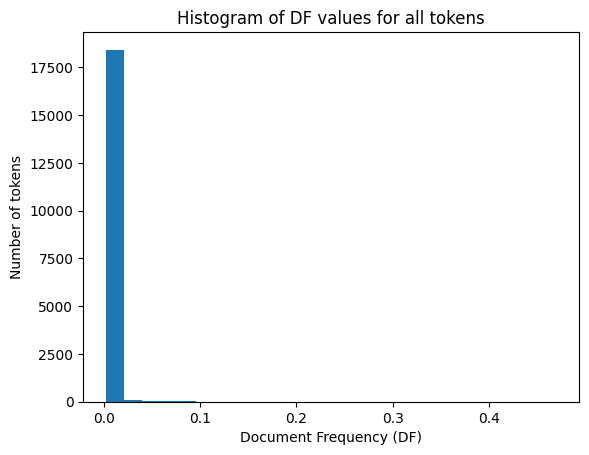

In [43]:
# histogram confirms what we observed above
plt.hist(df_values, bins=25)
plt.xlabel('Document Frequency (DF)')
plt.ylabel('Number of tokens')
plt.title('Histogram of DF values for all tokens')
plt.show()

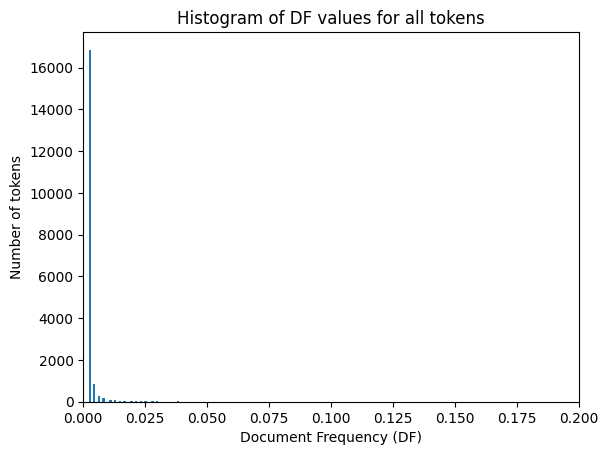

In [44]:
# histogram confirms what we observed above
plt.hist(df_values, bins=500)
plt.xlabel('Document Frequency (DF)')
plt.ylabel('Number of tokens')
plt.title('Histogram of DF values for all tokens')
plt.xlim([0,0.2])
plt.show()